# Analyze information flow results
Based on the method by [Geva et al. (2023)](https://arxiv.org/pdf/2304.14767). This notebook builds on the assumption that the scripts under `scripts/information_flow_analysis` have been run, such that we can load the corresponding results files.

## Set up environment

Make sure to stand in the root folder of the repo.

In [ ]:
import os
os.chdir("../../.")
os.getcwd()

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Set up plot design to match original Geva paper

In [4]:
palette_ = sns.color_palette("Set1")
palette = palette_[2:5] + palette_[7:]

## Analyze intermediate MHSA and MLP preds

Replicates Figure 5 from the Geva et al. paper.

### Load data

In [ ]:
SAVE_FOLDER = "data/information_flow_analysis"
DATA_PATHS = {"exact_fact_1000_gpt2_xl": f"{SAVE_FOLDER}/intermediate_mhsa_mlp_preds_exact_fact_recall_set_gpt2_xl.jsonl", 
              "guesswork_1000_gpt2_xl": f"{SAVE_FOLDER}/intermediate_mhsa_mlp_preds_random_guesswork_set_gpt2_xl.jsonl",
              "heuristics_1000_gpt2_xl": f"{SAVE_FOLDER}/intermediate_mhsa_mlp_preds_1000_combined_bias_mechanisms_gpt2_xl.jsonl",
              "generic_1000_gpt2_xl": f"{SAVE_FOLDER}/intermediate_mhsa_mlp_preds_generic_samples_gpt2_xl.jsonl",
              }

dsets = {d_name: pd.read_json(d_path, lines=True) for d_name, d_path in DATA_PATHS.items()}
dsets['exact_fact_1000_gpt2_xl'].head()

,example_index,prompt,subject,gold_attribute,attribute_tok,attribute_tok_str,attribute_tok_final_rank,layer,proj_vec,top_k_preds,attribute_tok_rank,attribute_tok_score,attribute_in_top_1,layer_1
0,0,Vinson Massif is located in the continent of,Vinson Massif,Antarctica,30185,Antarctica,0,0,MHSA,"[Tab, phone, Folder, left, bit, AA, Drag, er...",1878,0.073806,False,1
1,0,Vinson Massif is located in the continent of,Vinson Massif,Antarctica,30185,Antarctica,0,0,MLP,"[ white, mine, the, lac, AJ, jam, Ard, ...",30897,-1.199692,False,1
2,0,Vinson Massif is located in the continent of,Vinson Massif,Antarctica,30185,Antarctica,0,1,MHSA,"[ biome, region, encomp, �, fitting, , ex...",5432,0.243697,False,2
3,0,Vinson Massif is located in the continent of,Vinson Massif,Antarctica,30185,Antarctica,0,1,MLP,"[ white, mine, aerial, Ard, Flore, joint,...",33607,-0.801471,False,2
4,0,Vinson Massif is located in the continent of,Vinson Massif,Antarctica,30185,Antarctica,0,2,MHSA,"[ archaeological, world, historic, ruined, ...",4191,0.326503,False,3


### Plot the results

Exact fact recall

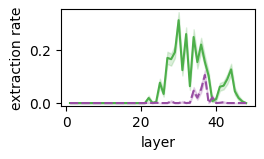

In [ ]:
plt.figure(figsize=(2.5,1.25))
order = ["MHSA", "MLP"]
tmp = dsets['exact_fact_1000_gpt2_xl']
ax = sns.lineplot(
    x="layer_1", y="attribute_in_top_1",
    hue="proj_vec", style="proj_vec",
    hue_order=order, style_order = order,
    data=tmp[tmp.proj_vec.isin(order)],
    palette=palette[:2]
)
ax.legend_.set_title("")
plt.legend('',frameon=False)
ax.set_ylabel("extraction rate")
ax.set_xlabel("layer")
plt.ylim([-0.01, 0.35])
plt.savefig(f"figures/information_flow_analysis/extraction_rate_exact.pdf", bbox_inches='tight')
plt.show()

Heuristics

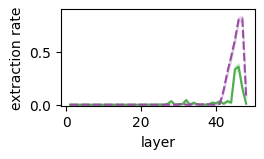

In [ ]:
plt.figure(figsize=(2.5,1.25))
order = ["MHSA", "MLP"]
tmp = dsets['heuristics_1000_gpt2_xl']
ax = sns.lineplot(
    x="layer_1", y="attribute_in_top_1",
    hue="proj_vec", style="proj_vec",
    hue_order=order, style_order = order,
    data=tmp[tmp.proj_vec.isin(order)],
    palette=palette[:2]
)
ax.legend_.set_title("")
ax.set_ylabel("extraction rate")
ax.set_xlabel("layer")
plt.legend('',frameon=False)
plt.ylim([-0.01, 0.9]) # note different y axis limits!!
plt.savefig(f"figures/information_flow_analysis/extraction_rate_heuristics.pdf", bbox_inches='tight')
plt.show()

Guesswork

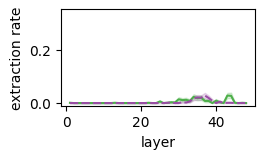

In [ ]:
plt.figure(figsize=(2.5,1.25))
order = ["MHSA", "MLP"]
tmp = dsets['guesswork_1000_gpt2_xl']
ax = sns.lineplot(
    x="layer_1", y="attribute_in_top_1",
    hue="proj_vec", style="proj_vec",
    hue_order=order, style_order = order,
    data=tmp[tmp.proj_vec.isin(order)],
    palette=palette[:2]
)
ax.legend_.set_title("")
ax.set_ylabel("extraction rate")
ax.set_xlabel("layer")
plt.legend('',frameon=False)
plt.ylim([-0.01, 0.35])
plt.savefig(f"figures/information_flow_analysis/extraction_rate_guesswork.pdf", bbox_inches='tight')
plt.show()

Check not only top-1

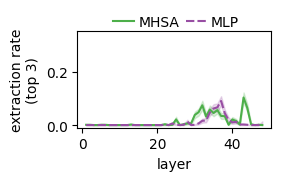

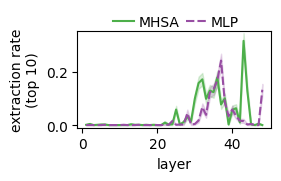

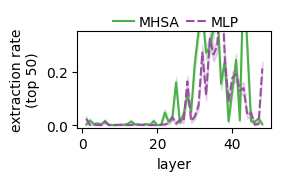

In [ ]:
order = ["MHSA", "MLP"]
tmp = dsets['guesswork_1000_gpt2_xl'].copy()
for n in [3, 10, 50]:
    plt.figure(figsize=(2.5,1.25))
    tmp[f'attribute_in_top_{n}'] = tmp.attribute_tok_rank <= (n-1)
    ax = sns.lineplot(
        x="layer_1", y=f"attribute_in_top_{n}",
        hue="proj_vec", style="proj_vec",
        hue_order=order, style_order = order,
        data=tmp[tmp.proj_vec.isin(order)],
        palette=palette[:2]
    )
    ax.legend_.set_title("")
    ax.set_ylabel(f"extraction rate\n(top {n})")
    ax.set_xlabel("layer")
    sns.move_legend(ax, "lower center", bbox_to_anchor=(0.51, 0.9), ncol=2, title=None, frameon=False, columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
    plt.ylim([-0.01, 0.35])
    plt.savefig(f"figures/information_flow_analysis/extraction_rate_guesswork_top_{n}.pdf", bbox_inches='tight')
    plt.show()

Generic LM

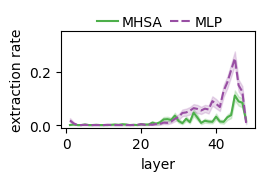

In [ ]:
plt.figure(figsize=(2.5,1.25))
order = ["MHSA", "MLP"]
tmp = dsets['generic_1000_gpt2_xl']
ax = sns.lineplot(
    x="layer_1", y="attribute_in_top_1",
    hue="proj_vec", style="proj_vec",
    hue_order=order, style_order = order,
    data=tmp[tmp.proj_vec.isin(order)],
    palette=palette[:2]
)
ax.legend_.set_title("")
ax.set_ylabel("extraction rate")
ax.set_xlabel("layer")
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.51, 0.9), ncol=2, title=None, frameon=False, columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
plt.ylim([-0.01, 0.35])
plt.savefig(f"figures/information_flow_analysis/extraction_rate_generic.pdf", bbox_inches='tight')
plt.show()

## Analyze information flow

Replicates Figure 2 from the Geva et al. paper.

### Load data

In [ ]:
SAVE_FOLDER = "data/information_flow_analysis"
DATA_PATHS = {"exact_fact_1000_gpt2_xl": f"{SAVE_FOLDER}/information_flow_exact_fact_recall_set_gpt2_xl.jsonl", 
              "guesswork_1000_gpt2_xl": f"{SAVE_FOLDER}/information_flow_random_guesswork_set_gpt2_xl.jsonl",
              "heuristics_1000_gpt2_xl": f"{SAVE_FOLDER}/information_flow_1000_combined_bias_mechanisms_gpt2_xl.jsonl",
              "generic_1000_gpt2_xl": f"{SAVE_FOLDER}/information_flow_generic_samples_gpt2_xl.jsonl",
              }

dsets = {d_name: pd.read_json(d_path, lines=True) for d_name, d_path in DATA_PATHS.items()}
dsets['exact_fact_1000_gpt2_xl'].head()

,example_index,prompt,answer,answer_t,answer_t_final_rank,block_desc,layer,base_score,new_score,relative diff,is_subject_position_zero,layer_1
0,0,Vinson Massif is located in the continent of,Antarctica,30185,0,subject,0,0.094846,0.105439,11.167867,True,1
1,0,Vinson Massif is located in the continent of,Antarctica,30185,0,subject,1,0.094846,0.090223,-4.874243,True,2
2,0,Vinson Massif is located in the continent of,Antarctica,30185,0,subject,2,0.094846,0.059173,-37.612194,True,3
3,0,Vinson Massif is located in the continent of,Antarctica,30185,0,subject,3,0.094846,0.055440,-41.547419,True,4
4,0,Vinson Massif is located in the continent of,Antarctica,30185,0,subject,4,0.094846,0.051648,-45.545362,True,5


### Get plots

Exact fact

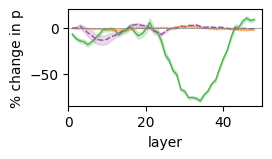

In [ ]:
plt.figure(figsize=(2.5,1.25))
tmp = dsets['exact_fact_1000_gpt2_xl']
ax = sns.lineplot(tmp, x="layer_1", y="relative diff", 
                  hue="block_desc",
                  style="block_desc",
                  dashes=True,
                  palette=palette[:3],
                  linewidth=1)
ax.set_xlabel("layer")
ax.set_ylabel("% change in p")
plt.legend('',frameon=False)
plt.ylim([-85, 20])
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlim([0, 50])
plt.savefig(f"figures/information_flow_analysis/information_flow_exact.pdf", bbox_inches='tight')
plt.show()

Heuristics

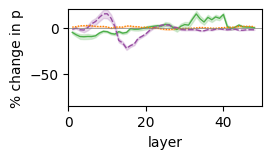

In [ ]:
plt.figure(figsize=(2.5,1.25))
tmp = dsets['heuristics_1000_gpt2_xl']
ax = sns.lineplot(tmp, x="layer_1", y="relative diff", 
                  hue="block_desc",
                  style="block_desc",
                  dashes=True,
                  palette=palette[:3],
                  linewidth=1)
ax.set_xlabel("layer")
ax.set_ylabel("% change in p")
plt.legend('',frameon=False)
plt.ylim([-85, 20])
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlim([0, 50])
plt.savefig(f"figures/information_flow_analysis/information_flow_heuristics.pdf", bbox_inches='tight')
plt.show()

Guesswork

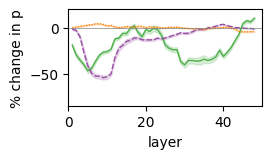

In [ ]:
plt.figure(figsize=(2.5,1.25))
tmp = dsets['guesswork_1000_gpt2_xl']
ax = sns.lineplot(tmp, x="layer_1", y="relative diff", 
                  hue="block_desc",
                  style="block_desc",
                  dashes=True,
                  palette=palette[:3],
                  linewidth=1)
ax.set_xlabel("layer")
ax.set_ylabel("% change in p")
plt.legend('',frameon=False)
plt.ylim([-85, 20])
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlim([0, 50])
plt.savefig(f"figures/information_flow_analysis/information_flow_guesswork.pdf", bbox_inches='tight')
plt.show()

Generic

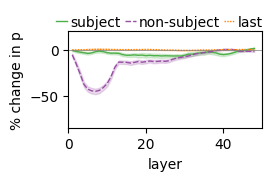

In [ ]:
plt.figure(figsize=(2.5,1.25))
tmp = dsets['generic_1000_gpt2_xl']
ax = sns.lineplot(tmp, x="layer_1", y="relative diff", 
                  hue="block_desc",
                  style="block_desc",
                  dashes=True,
                  palette=palette[:3],
                  linewidth=1)
ax.set_xlabel("layer")
ax.set_ylabel("% change in p")
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.47, 0.9), ncol=3, title=None, frameon=False, columnspacing=0.3, handletextpad=0.2, handlelength=0.8)
plt.ylim([-85, 20])
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
plt.xlim([0, 50])
plt.savefig(f"figures/information_flow_analysis/information_flow_generic.pdf", bbox_inches='tight')
plt.show()